In [ ]:
# !pip install networkx

In [3]:
import networkx as nx

In [121]:
G = nx.DiGraph()

n_nodes = int(input('Enter number of nodes: '))

nodes = []

for i in range(0, n_nodes):
    node = int(input('Enter node: '))
    nodes.append(node) 

start_node = int (input('Enter start node: '))
final_node = int (input('Enter final node: '))

edges = []

while(True):
    edge = input('Enter edge: ')
    tuple_edge = tuple(int(item) for item in edge.split())
    edges.append(tuple_edge)
    if edge == '':
      edges.pop()
      break

Enter number of nodes: 7
Enter node: 0
Enter node: 1
Enter node: 2
Enter node: 3
Enter node: 4
Enter node: 5
Enter node: 6
Enter start node: 0
Enter final node: 6
Enter edge: 0 1
Enter edge: 0 2
Enter edge: 1 2 
Enter edge: 2 3 
Enter edge: 2 4 
Enter edge: 3 6
Enter edge: 4 5 
Enter edge: 4 6 
Enter edge: 5 4 
Enter edge: 


In [122]:
G.add_nodes_from(nodes)
G.add_edges_from(edges)

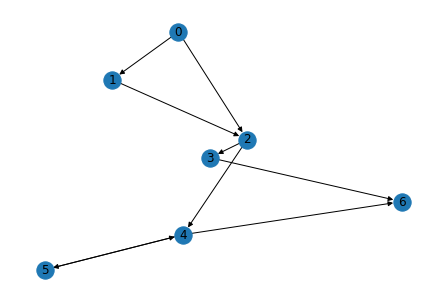

In [123]:
nx.draw(G, with_labels=True)

In [124]:
nodes.remove(final_node)
simple_paths = []
candidate_prime_paths = []

for node in nodes:
  neighbors = list(G.neighbors(node))
  # print(neighbors)
  if len(neighbors) == 0: 
    continue
  
  i = len(neighbors)

  current_node_paths = []

  while(i > 0):
      path = [node]
      current_node_paths.append(path)
      # print(path)
      i -= 1

  i = 0
  for current_node_path in current_node_paths:
    path = current_node_path + [neighbors[i]]
    print(path)
    simple_paths.append(path)
    i += 1

    last_node = path[-1]
    last_node_neighbors = list(G.neighbors(last_node))
    if len(last_node_neighbors) == 0: # if it's a final node
      candidate_prime_paths.append(path)
      simple_paths.remove(path)

[0, 1]
[0, 2]
[1, 2]
[2, 3]
[2, 4]
[3, 6]
[4, 5]
[4, 6]
[5, 4]


In [125]:
itr = 1
while (len(simple_paths) > 0): 
  all_itr_paths = []
  print()
  print("iteration: ", itr)

  for simple_path in simple_paths:
    # print(simple_path)
    first_node = simple_path[0]
    last_node = simple_path[-1]

    neighbors = list(G.neighbors(last_node))
    # print(neighbors)
    
    i = len(neighbors)
    curr_itr_paths = []

    while(i > 0):
        curr_itr_paths.append(simple_path)
        # print(simple_path)
        i -= 1

    i = 0
    for curr_itr_path in curr_itr_paths:
      path = curr_itr_path + [neighbors[i]]
      all_itr_paths.append(path)
      i += 1
      # print(path)
      last_node = path[-1]

      if (path.count(last_node) == 2):
        if (first_node == last_node):
          print('cyclic path: ', path)
          candidate_prime_paths.append(path)
          all_itr_paths.remove(path)
        else:
          path.pop()
          candidate_prime_paths.append(path)
          all_itr_paths.remove(path)
          print('cant continue: ', path)
        
      elif (last_node == final_node):
        print('final node reached: ', path)
        candidate_prime_paths.append(path)
      else:
        print('normal path: ', path)

  simple_paths = all_itr_paths

  itr += 1


iteration:  1
normal path:  [0, 1, 2]
normal path:  [0, 2, 3]
normal path:  [0, 2, 4]
normal path:  [1, 2, 3]
normal path:  [1, 2, 4]
final node reached:  [2, 3, 6]
normal path:  [2, 4, 5]
final node reached:  [2, 4, 6]
cyclic path:  [4, 5, 4]
cyclic path:  [5, 4, 5]
final node reached:  [5, 4, 6]

iteration:  2
normal path:  [0, 1, 2, 3]
normal path:  [0, 1, 2, 4]
final node reached:  [0, 2, 3, 6]
normal path:  [0, 2, 4, 5]
final node reached:  [0, 2, 4, 6]
final node reached:  [1, 2, 3, 6]
normal path:  [1, 2, 4, 5]
final node reached:  [1, 2, 4, 6]
cant continue:  [2, 4, 5]

iteration:  3
final node reached:  [0, 1, 2, 3, 6]
normal path:  [0, 1, 2, 4, 5]
final node reached:  [0, 1, 2, 4, 6]
cant continue:  [0, 2, 4, 5]
cant continue:  [1, 2, 4, 5]

iteration:  4
cant continue:  [0, 1, 2, 4, 5]


In [126]:
for candidate_prime_path in candidate_prime_paths:
  print(candidate_prime_path)

[3, 6]
[4, 6]
[2, 3, 6]
[2, 4, 6]
[4, 5, 4]
[5, 4, 5]
[5, 4, 6]
[0, 2, 3, 6]
[0, 2, 4, 6]
[1, 2, 3, 6]
[1, 2, 4, 6]
[2, 4, 5]
[0, 1, 2, 3, 6]
[0, 1, 2, 4, 6]
[0, 2, 4, 5]
[1, 2, 4, 5]
[0, 1, 2, 4, 5]


In [127]:
max_length = len(candidate_prime_paths[-1])

for candidate_prime_path in candidate_prime_paths:
  if len(candidate_prime_path) > max_length:
    max_length = len(candidate_prime_path)

In [128]:
potential_subpaths = []
final_prime_paths = []

for candidate_prime_path in candidate_prime_paths:
  if len(candidate_prime_path) < max_length:
    potential_subpaths.append(candidate_prime_path)
  else:
    final_prime_paths.append(candidate_prime_path)

In [129]:
for potential_subpath in potential_subpaths:
  print(potential_subpath)

[3, 6]
[4, 6]
[2, 3, 6]
[2, 4, 6]
[4, 5, 4]
[5, 4, 5]
[5, 4, 6]
[0, 2, 3, 6]
[0, 2, 4, 6]
[1, 2, 3, 6]
[1, 2, 4, 6]
[2, 4, 5]
[0, 2, 4, 5]
[1, 2, 4, 5]


In [130]:
determined_subpath = []

for final_prime_path in final_prime_paths:
  for potential_subpath in potential_subpaths:
    for idx in range(len(final_prime_path) - len(potential_subpath) + 1):
      if final_prime_path[idx: idx + len(potential_subpath)] == potential_subpath:
          print(potential_subpath, final_prime_path)
          print()
          determined_subpath.append(potential_subpath)
          break

[3, 6] [0, 1, 2, 3, 6]

[2, 3, 6] [0, 1, 2, 3, 6]

[1, 2, 3, 6] [0, 1, 2, 3, 6]

[4, 6] [0, 1, 2, 4, 6]

[2, 4, 6] [0, 1, 2, 4, 6]

[1, 2, 4, 6] [0, 1, 2, 4, 6]

[2, 4, 5] [0, 1, 2, 4, 5]

[1, 2, 4, 5] [0, 1, 2, 4, 5]



In [131]:
determined_subpath

[[3, 6],
 [2, 3, 6],
 [1, 2, 3, 6],
 [4, 6],
 [2, 4, 6],
 [1, 2, 4, 6],
 [2, 4, 5],
 [1, 2, 4, 5]]

In [132]:
final_prime_paths.clear()

for candidate_prime_path in candidate_prime_paths:
  if candidate_prime_path not in determined_subpath:
    final_prime_paths.append(candidate_prime_path)


In [133]:
final_prime_paths

[[4, 5, 4],
 [5, 4, 5],
 [5, 4, 6],
 [0, 2, 3, 6],
 [0, 2, 4, 6],
 [0, 1, 2, 3, 6],
 [0, 1, 2, 4, 6],
 [0, 2, 4, 5],
 [0, 1, 2, 4, 5]]